In [116]:
"""
Date: May 21, 2018
Project: NeuroScience Hackathon ::: Kuhlman - Sleep-wake cycle effects on neural activity
Location: CMU-Africa campus in Kigali, Rwanda
@uthor: Yvonne Wambui Gitau, John Ibare, Hood S. Mukiibi, Samuel Wasswa
Email: ywambui,jibare,msemwogerere,swasswa {@africa.cmu.edu}

Description:
============
For this project, we aim to improve performance of background discriminators by optimizing 
the neurons combination in the visual cortex

Approaches:
===========
* We explore the data by looking at data from first Mouse which is MouseTwo in this case. 
We explore the natural scenes in order to understand the relationship the raw fluoresence 
value and the different frames for each Neuron
* We also explore the data further using dynamic time warping in orde to understand the 
similarities between the neurons based on the temporary frequency. Here, we create clusters
of the neurons based on the response to natural scenes
"""
# Importing libraries to be used in data manipulation
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import networkx as nx
import seaborn as sns
import pandas as pd
from networkx.algorithms import bipartite
from networkx.algorithms.community.centrality import girvan_newman

# Reading the data files for the mice
mouseOneData = sio.loadmat('Mouse_1_data.mat')
mouseTwoData = sio.loadmat('Mouse_2_data.mat')
mouseThreeData = sio.loadmat('Mouse_3_data.mat')
mouseFourData = sio.loadmat('Mouse_4_data.mat')
mouseFiveData = sio.loadmat('Mouse_5_data.mat')
mouseSixData = sio.loadmat('Mouse_6_data.mat')

# Natural Scene Analysis
# Analysis for the first mouse which is mouse two in this case
def natural_scene_analysis(mouseData=mouseTwoData):
    nSceneRawTrace = mouseData['Natural_Scenes_data']['raw_trace'] # Getting raw trace for natural scene
    nSceneStimulusFrameInd = mouseData['Natural_Scenes_data']['stimulus_frame_index']
    nSceneRemovedBlock = mouseData['Natural_Scenes_data']['isRemovedBlock']
    nSceneRawTraceTrials = nSceneRawTrace[0][0]
    
    #
    nSceneTrialImages = []
    df = pd.DataFrame()
    for trial in range(len(nSceneRawTraceTrials)):
        neurons = nSceneRawTraceTrials[trial][0]
        images_to_be_removed = np.where(nSceneRemovedBlock[0][0][trial] == 1)
        neuronsFrames = []
        imageArray = []
        try:
            df[trial] = neurons.flatten()
        except Exception as e:
            continue
        for neuron in range(len(neurons)):
            mean = np.mean(neurons[neuron])
            std = np.std(neurons[neuron])
            frameInd = []
            for index, spike in np.ndenumerate(neurons[neuron]):
                if spike > mean + (2*std) or spike < mean - (2*std):
                    frameInd.append(index[0])
            neuronsFrames.append(frameInd)

        for neuronSpikes in neuronsFrames:
            image = []
            for images in neuronSpikes:
                if(nSceneStimulusFrameInd[0][0][trial][0][0][images] not in images_to_be_removed[0]+1):
                    image.append(nSceneStimulusFrameInd[0][0][trial][0][0][images])
            imageArray.append(np.unique(image))
        nSceneTrialImages.append(imageArray)
    #
    cor = df.corr()
    ax = sns.heatmap(cor,
               xticklabels=cor.columns,
               yticklabels=cor.columns)
    ax.set_title('Heatmap to show correlation between the different trials - Natural Scenes')
    plt.figure(figsize=(16,20))
    
    for y in range(43):
        im_array = []
        trial1 = nx.Graph()
        trial1.add_nodes_from(list(range(595)),bipartite='neurons')
        trial1.add_nodes_from(list(range(21)),bipartite='images')
        for index, x in np.ndenumerate(nSceneTrialImages[y]):
            for im in x:
                if im != 0:
                    im_array.append((index[0],str(im)))
        im_array
        trial1.add_edges_from(im_array)
        bipartite.is_bipartite(trial1)
        nx.draw(trial1)
        plt.show()
    #
    comp = girvan_newman(trial1)
    comp
    tuple(sorted(c) for c in next(comp))
    trial1.edges()
    P = bipartite.projected_graph(trial1, list(range(595)))
    nx.draw(P)
    plt.show()
    

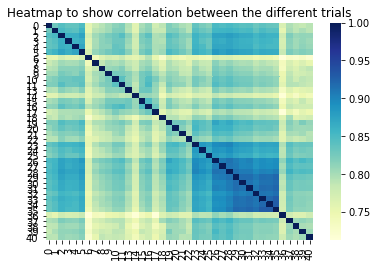

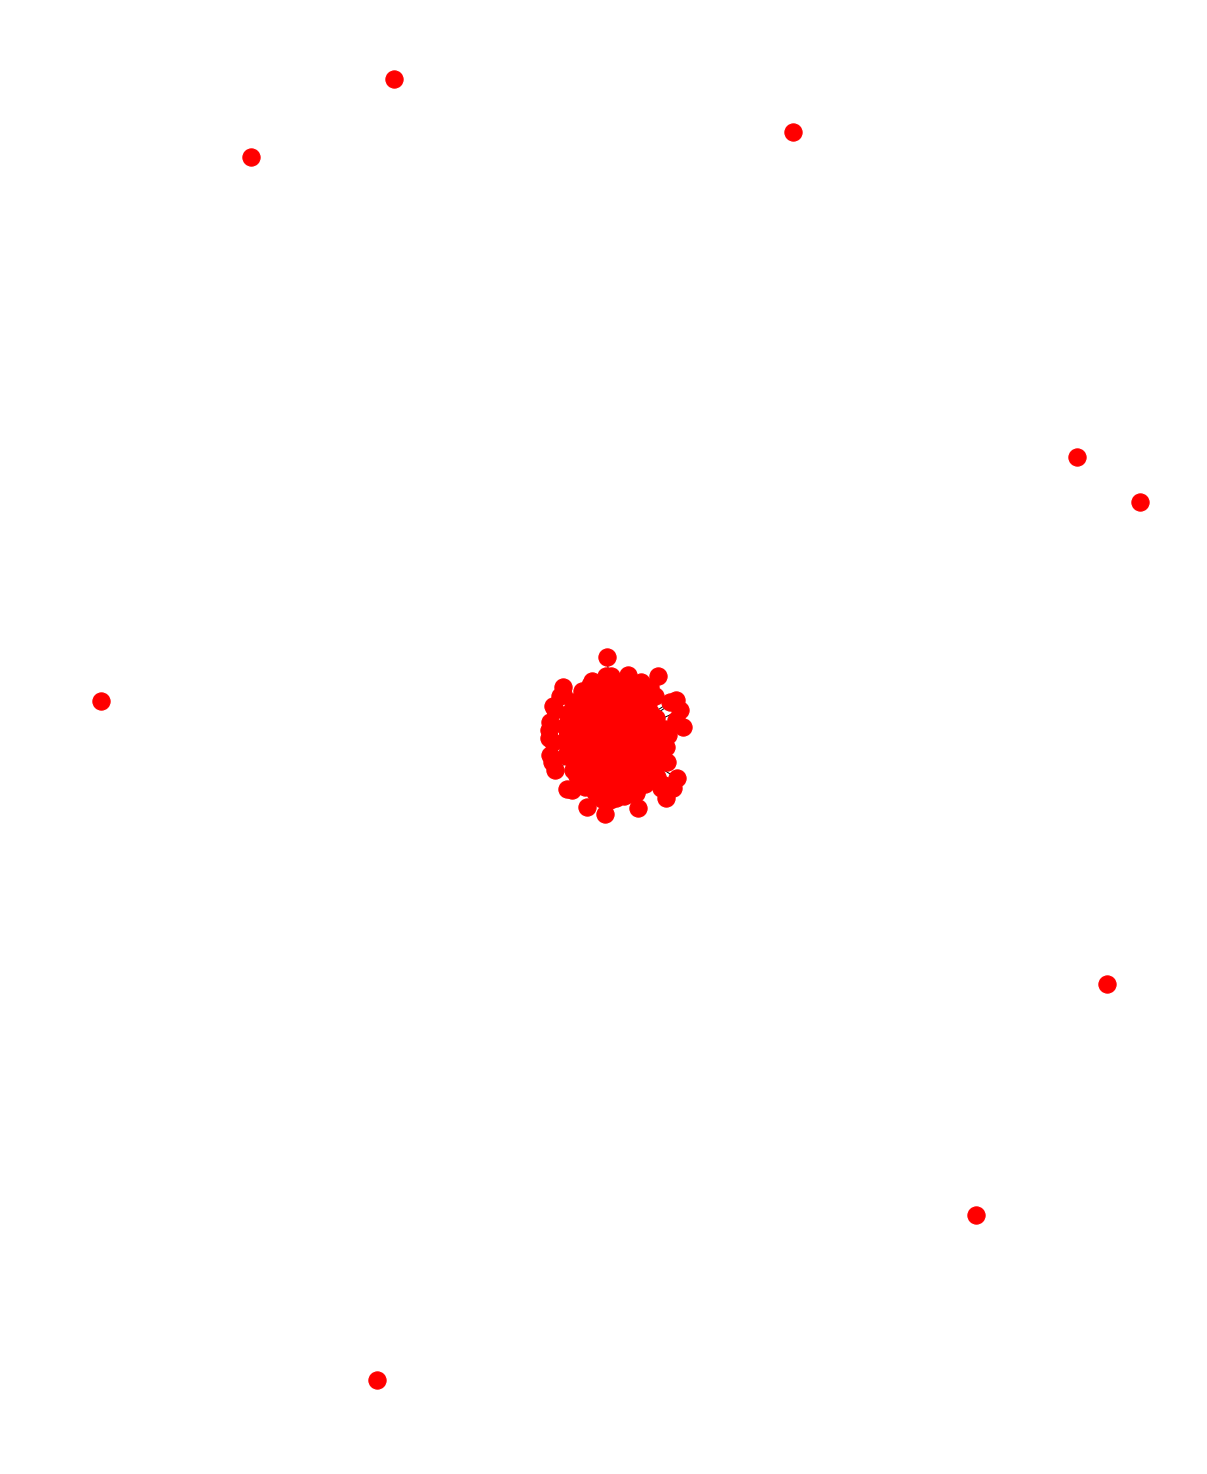

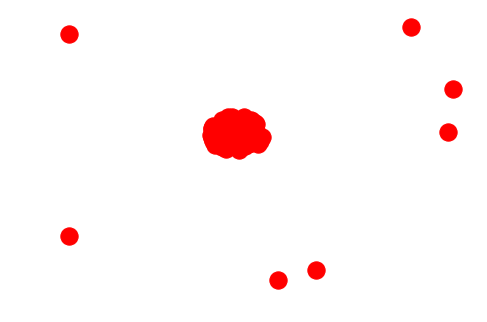

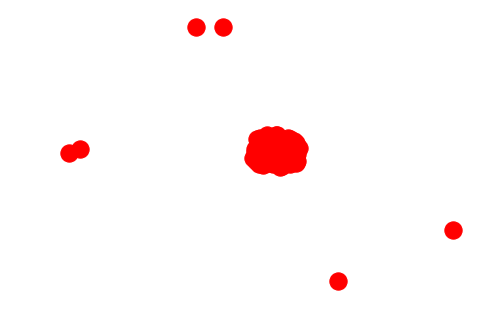

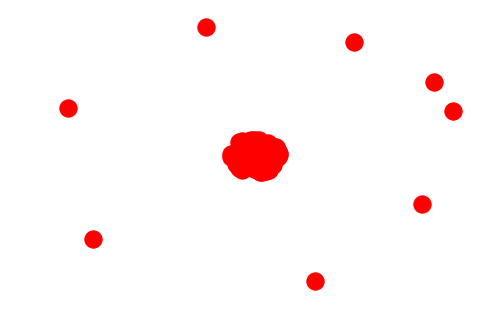

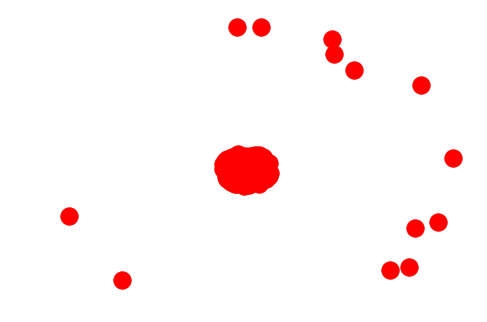

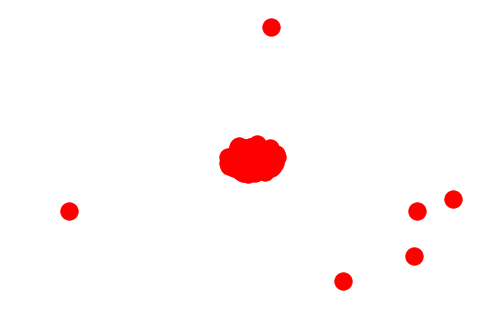

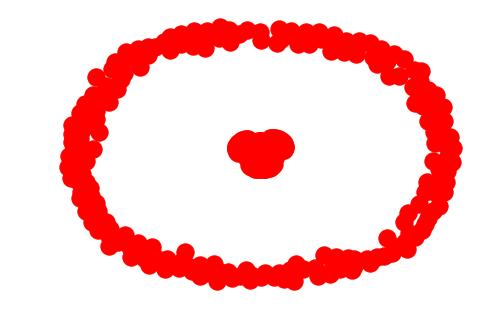

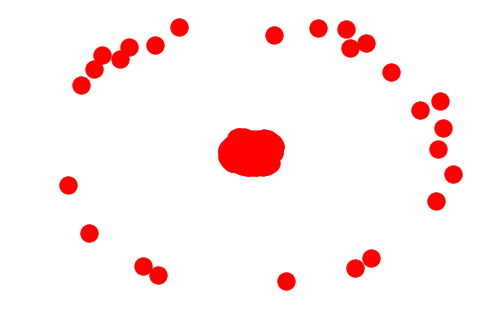

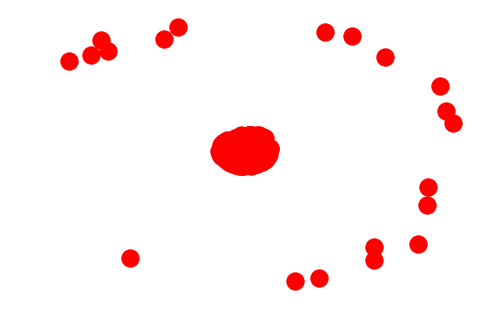

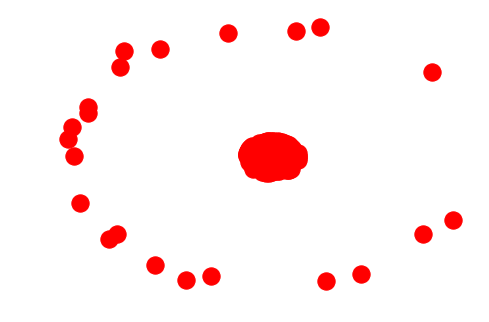

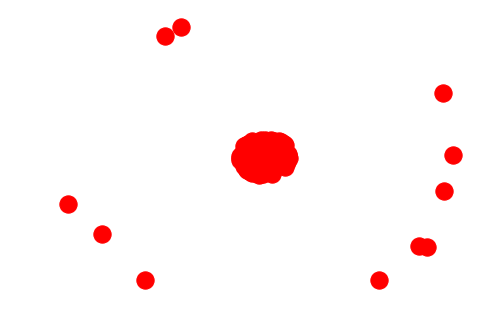

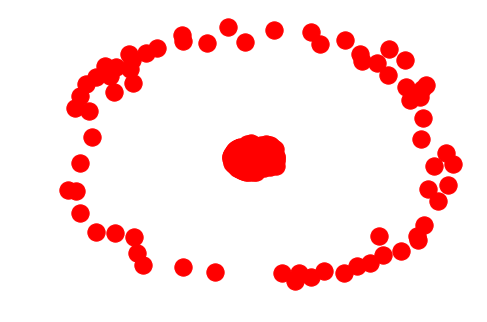

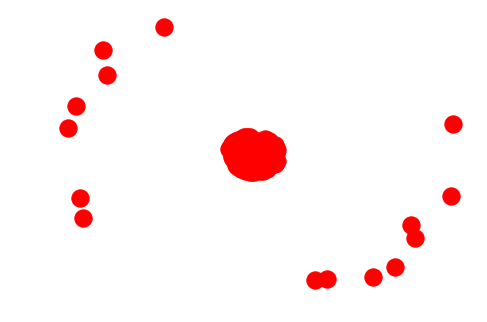

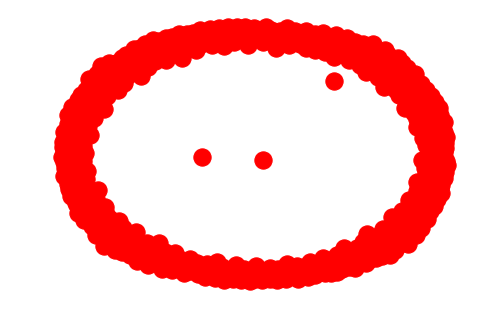

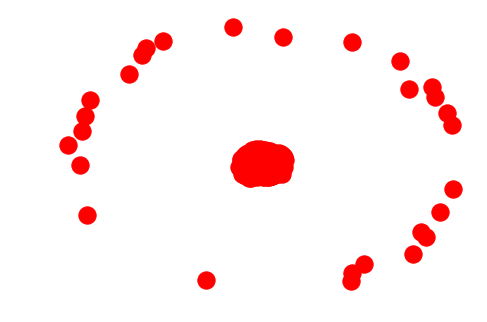

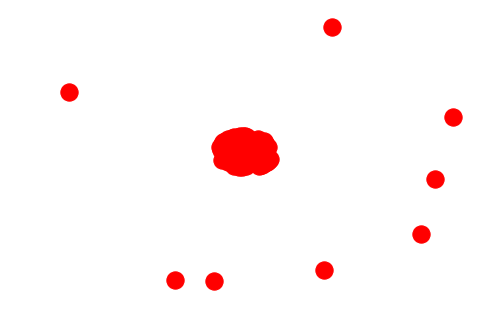

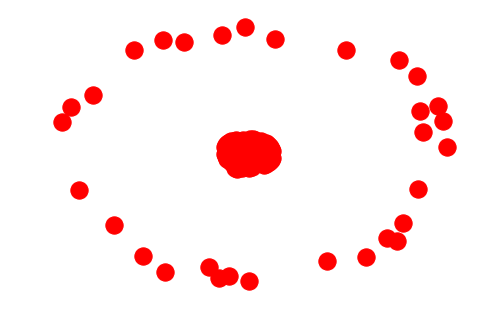

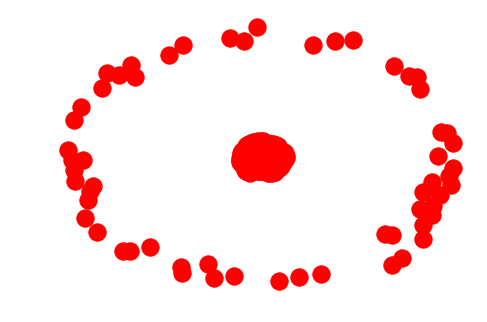

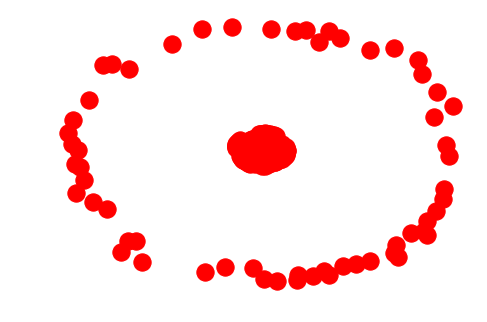

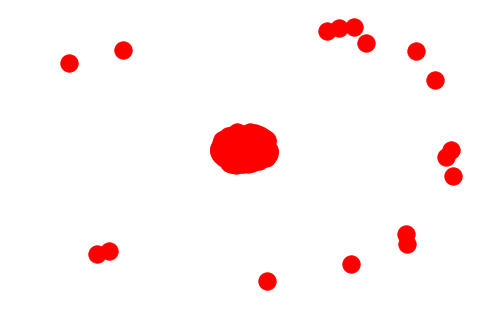

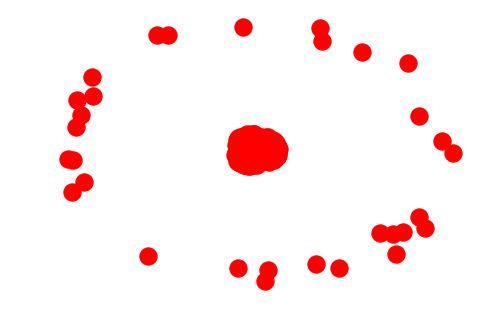

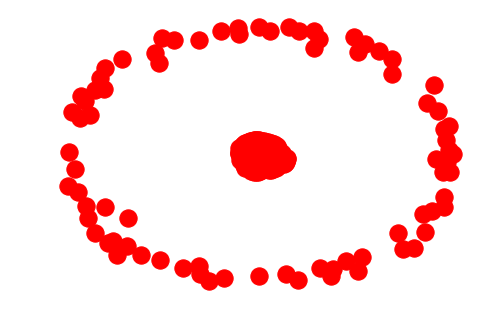

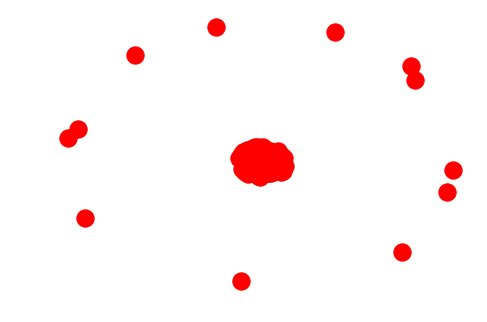

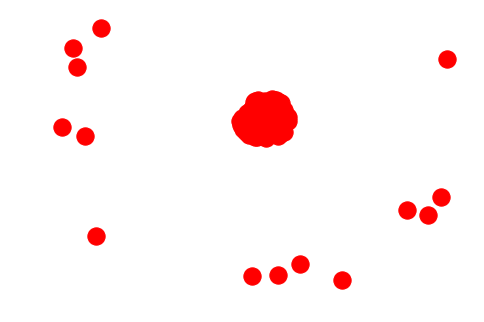

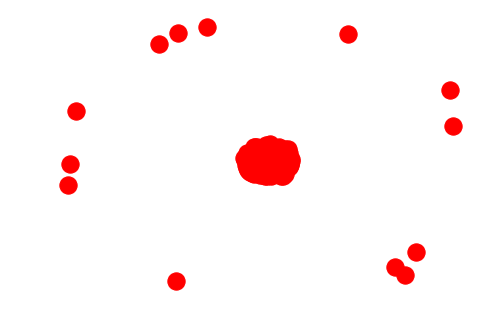

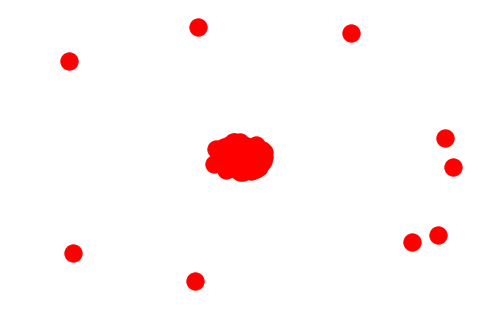

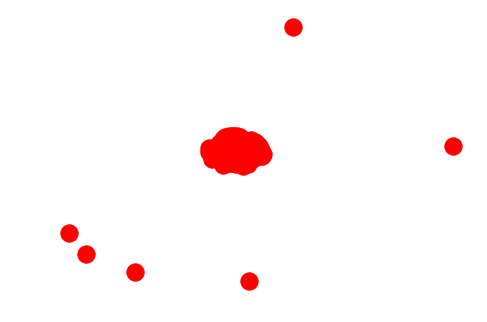

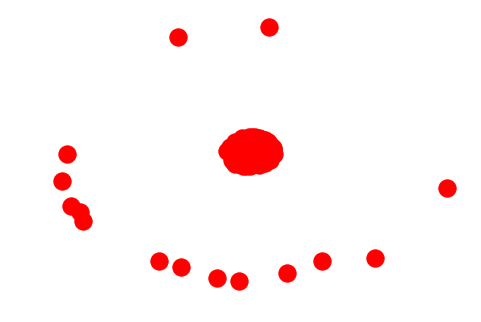

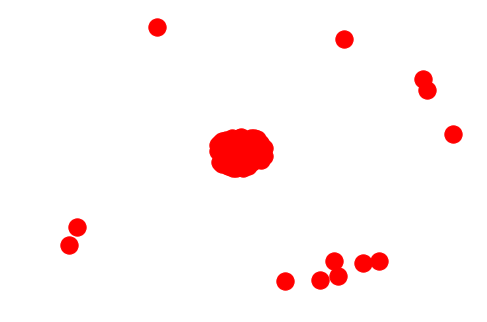

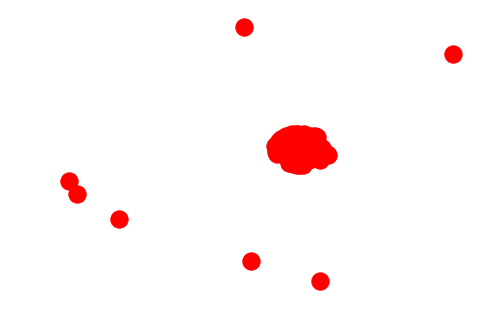

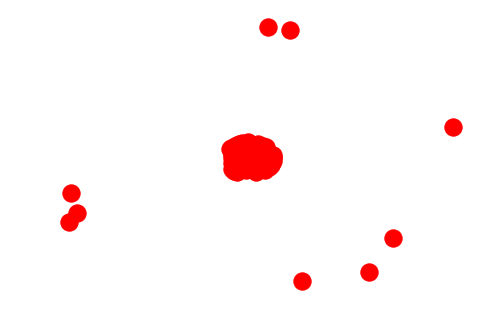

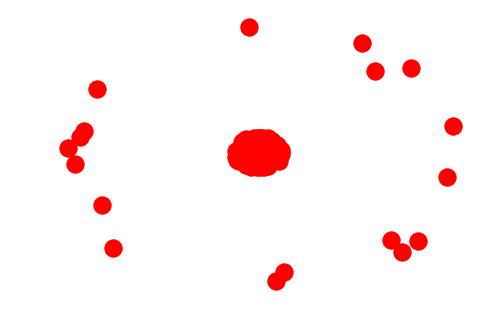

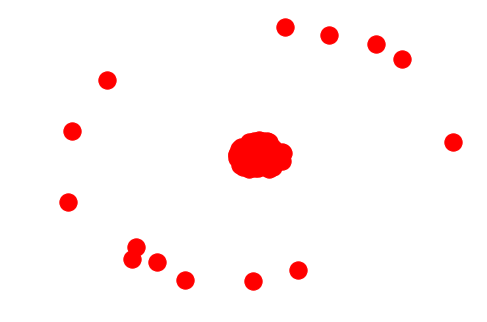

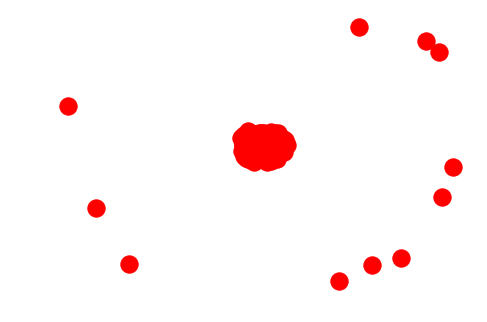

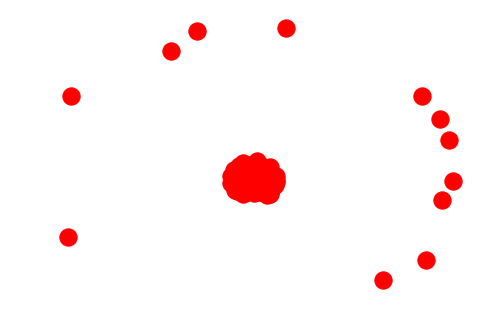

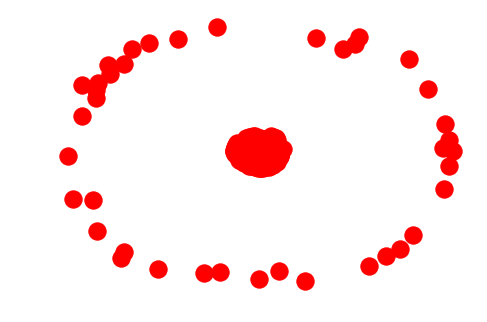

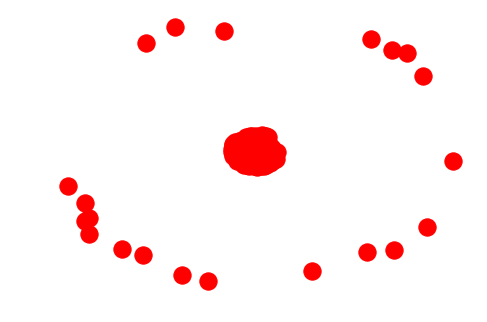

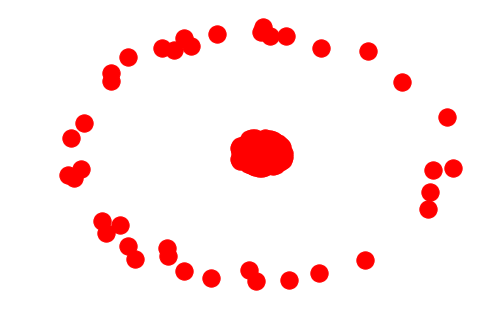

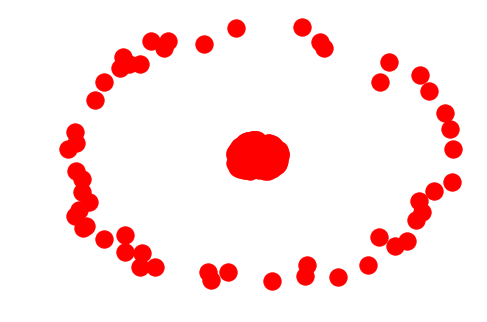

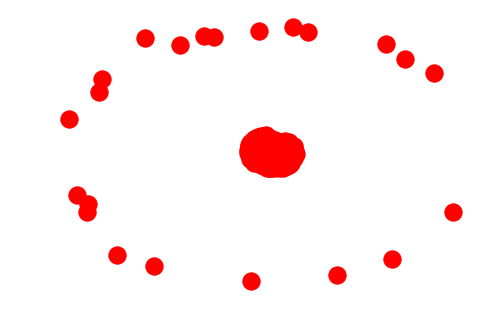

IndexError: list index out of range

In [117]:
natural_scene_analysis()

In [120]:
# Gratings Analysis
def gratings_analysis(mouseData=mouseTwoData):
    gratingsRawTrace = mouseData['Gratings_data']['raw_trace'] # get the raw trace of natural scene
    gratingsStimulusFrameIndex = mouseData['Gratings_data']['stimulus_frame_index']
    gratingsRemovedBlocked = mouseData['Gratings_data']['isRemovedBlock']
    gratingsRawTraceTrials = gratingsRawTrace[0][0]

    gratingsTrialImages = []
    df = pd.DataFrame()
    for trial in range(len(gratingsRawTraceTrials)):
        neurons = gratingsRawTraceTrials[trial][0]
        images_tobe_removed = np.where(gratingsRemovedBlocked[0][0][trial] == 1) #the index
        neurons_frames = []
        image_array = []
        try:
            df[trial] = neurons.flatten()
        except Exception as e:
            continue
        for neuron in range(len(neurons)):
            mean = np.mean(neurons[neuron])
            std = np.std(neurons[neuron])
            frame_index = []
            for index,spike in np.ndenumerate(neurons[neuron]):
                if spike > mean + (2*std) or spike < mean - (2*std):
                    frame_index.append(index[0])

            neurons_frames.append(frame_index)   

        for neuron_spikes in neurons_frames:
            image = []        
            for images in neuron_spikes:
                if (gratingsStimulusFrameIndex[0][0][trial][0][0][images] not in images_tobe_removed[0]+1):
                    image.append(gratingsStimulusFrameIndex[0][0][trial][0][0][images])


            image_array.append(np.unique(image))


        gratingsTrialImages.append(image_array)
    
    cor = df.corr()
    ax = sns.heatmap(cor,
               xticklabels=cor.columns,
               yticklabels=cor.columns)
    ax.set_title('Heatmap to show correlation between the different trials - Gratings')
    plt.figure(figsize=(16,20))
    for y in range(22):
        im_array = []
        trial1 = nx.Graph()
        trial1.add_nodes_from(list(range(595)), bipartite='neurons')
        trial1.add_nodes_from(list(range(62)), bipartite='gratings')
        for index,x in np.ndenumerate(gratingsTrialImages[y]):
            for im in x:
                if im != 0:
                    im_array.append((index[0],str(im)))
        im_array
        trial1.add_edges_from(im_array)
        bipartite.is_bipartite(trial1)
        nx.draw(trial1)
        plt.show()

    #
    comp = girvan_newman(trial1)
    comp
    tuple(sorted(c) for c in next(comp))
    trial1.edges()
    P = bipartite.projected_graph(trial1, list(range(595)))
    nx.draw(P)
    plt.show()

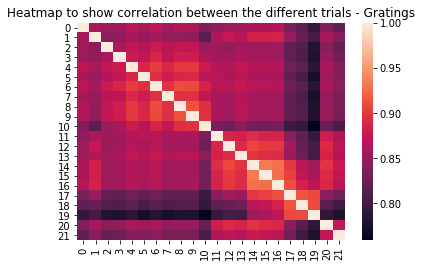

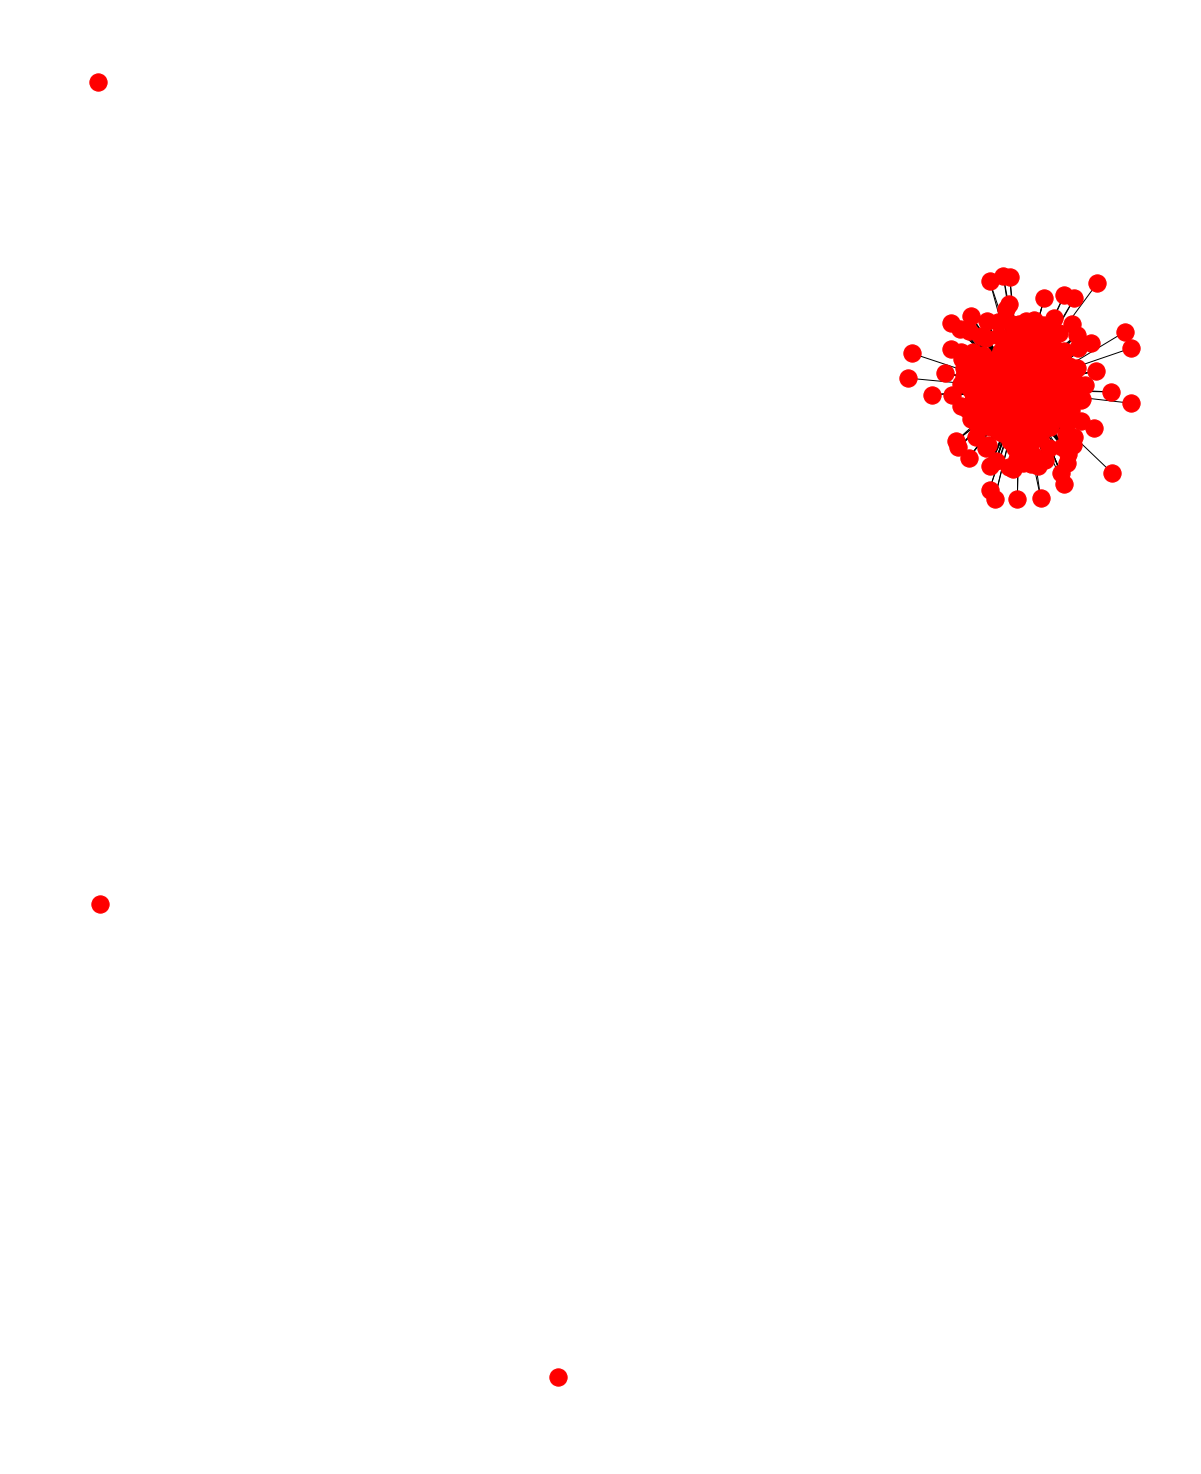

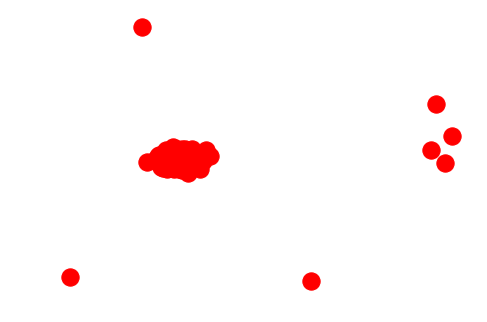

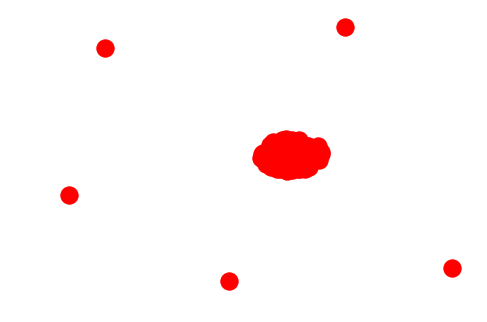

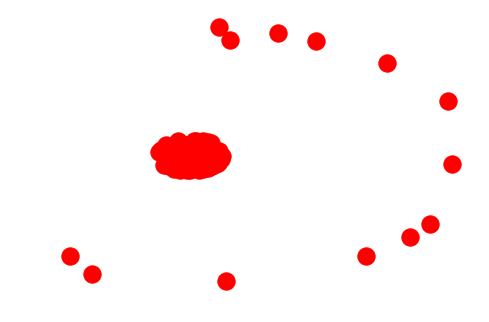

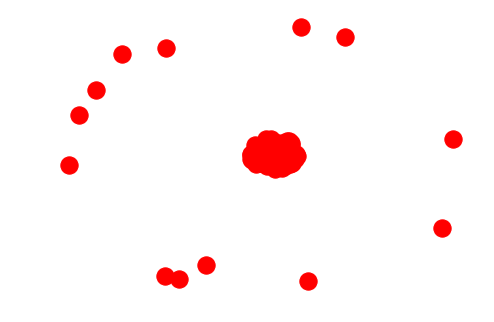

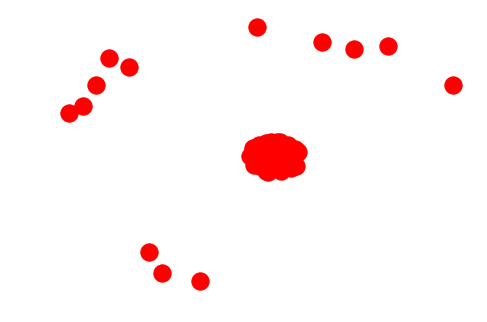

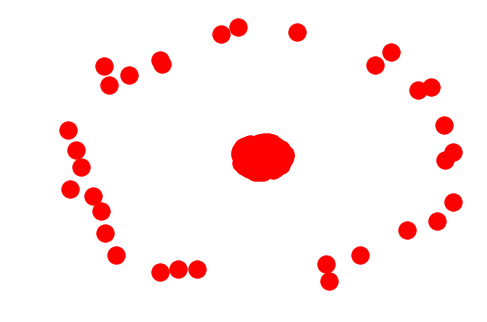

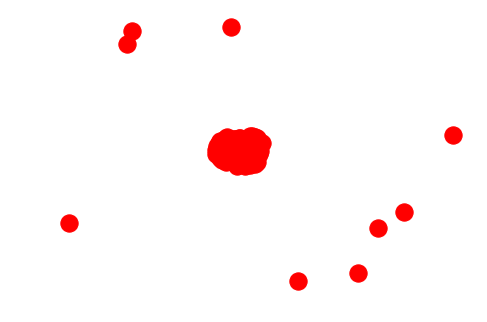

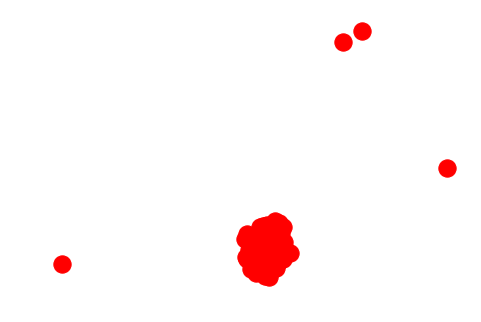

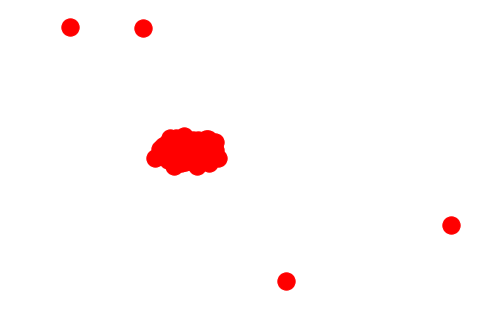

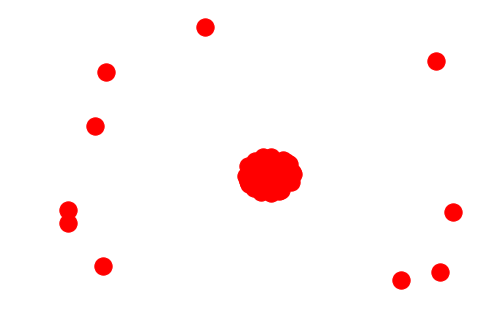

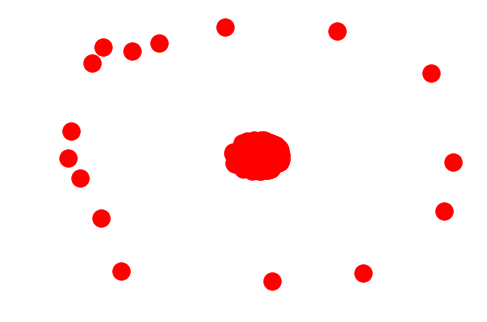

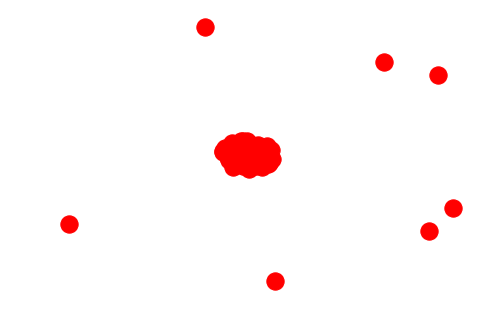

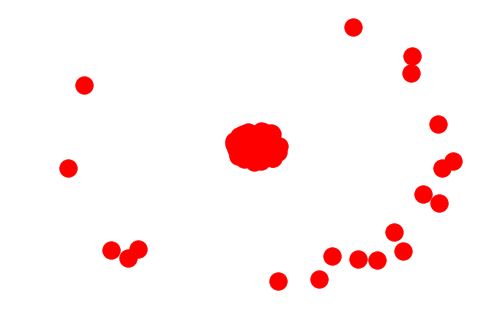

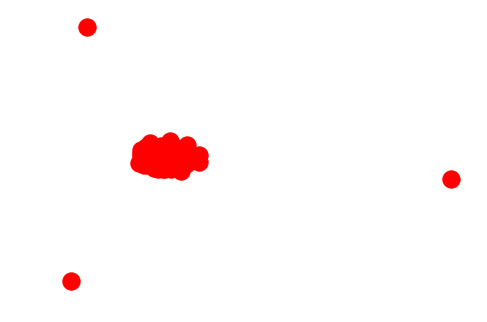

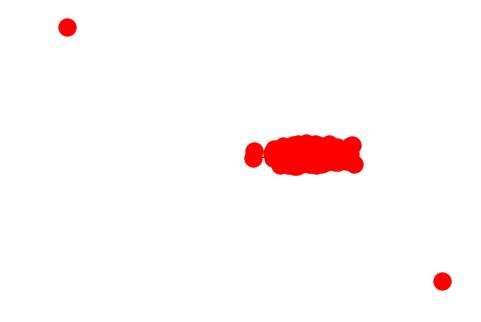

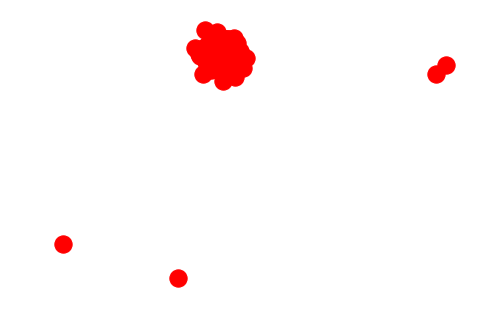

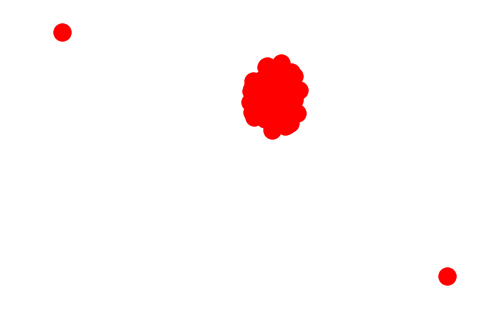

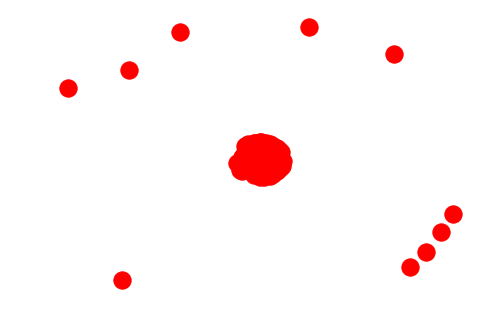

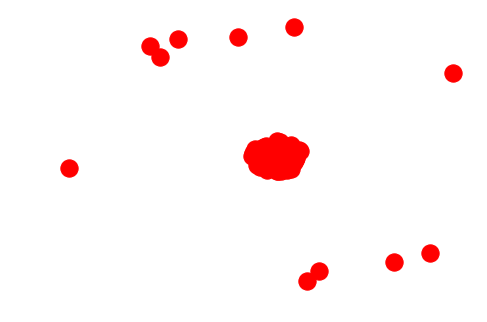

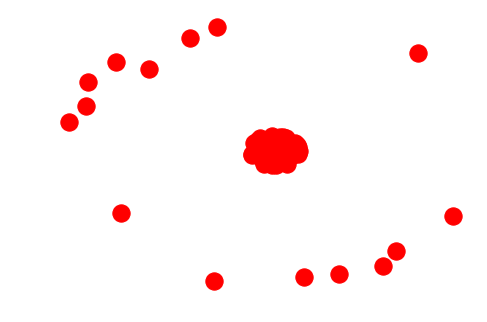

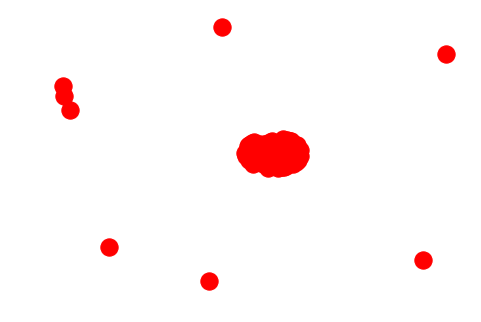

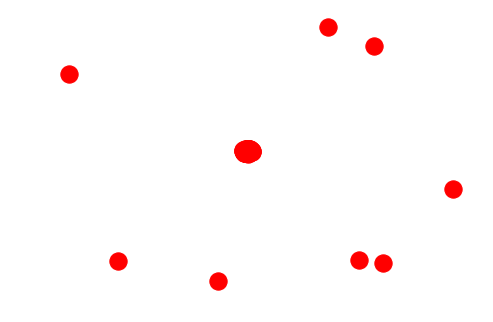

In [121]:
gratings_analysis()